In [284]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from time import sleep
import sys

data = np.genfromtxt('input2.csv', delimiter = ",")
print(data.shape)

df = pd.DataFrame(data, columns = ['age','weight','height'])

(79, 3)


In [285]:
df.describe()

,age,weight,height
count,79.000000,79.000000,79.000000
mean,5.210506,18.306604,1.096461
std,1.911619,6.156544,0.147693
min,2.000000,10.210270,0.803755
25%,3.585000,13.483010,0.990246
50%,5.210000,16.833040,1.093230
75%,6.835000,20.486755,1.174633
max,8.460000,40.946140,1.414521


In [387]:
X = np.array(data[:,:2])
muX = np.mean(X,axis=0)
sigmaX = np.std(X,axis=0)
X = (X - muX)/sigmaX
X= np.insert(X,0,1,axis=1)
muX, sigmaX

(array([  5.21050633,  18.3066043 ]), array([ 1.89948154,  6.11745394]))

In [391]:
Y = np.array(data[:,2])

In [392]:
learningRates = [0.5,0.6,0.7,0.8,0.9,1]
iterations = 10
solution = np.ones((len(learningRates),5))*iterations
error = np.zeros((len(learningRates),iterations))
index = 0
print(np.mean(Y**2))

1.22376327287


In [393]:
Y.shape

(79,)

In [394]:
Z = Y*Y
Z.ravel()
Z

array([ 0.6484237 ,  0.84543262,  0.82510063,  0.6460229 ,  0.65830018,
        0.90059607,  0.93402657,  0.8627443 ,  0.7431302 ,  0.96268123,
        0.97689068,  1.00951854,  1.00383367,  0.98702218,  0.80548381,
        0.78983319,  0.86919634,  0.87943883,  1.1031721 ,  1.11667195,
        0.96456893,  0.8286643 ,  1.13489818,  1.05750372,  0.85668871,
        0.8661768 ,  1.2135534 ,  0.9842886 ,  1.24221724,  1.13195981,
        1.01734255,  1.09126228,  1.30102311,  0.96516929,  1.1279056 ,
        1.21029482,  1.36176063,  1.34862001,  1.01866429,  1.19097061,
        1.20385223,  1.05170973,  1.15819353,  1.2429485 ,  1.40942722,
        1.19515183,  1.14414684,  1.37702245,  1.51950984,  1.11854949,
        1.5511731 ,  1.56701325,  1.36283677,  1.18783188,  1.47731141,
        1.25044281,  1.26221405,  1.2333102 ,  1.7142534 ,  1.22967917,
        1.38239747,  1.32045839,  1.28919447,  1.79312721,  1.76958103,
        1.72579718,  1.37713041,  1.34334127,  1.86966243,  1.36

In [395]:

for l in learningRates:
    weights = np.zeros(3)
    for i in range(iterations):
        f = np.dot(X,weights)
        loss = np.mean((f- Y)**2)/2
        error[index,i] = loss
        print(loss,l,i,weights)
        weights -= l * np.mean((f-Y).reshape(-1,1)*X,axis = 0)
    solution[index,0] = l
    
    solution[index,2] = sigmaY * (weights[0] - np.sum(weights[1:] * muX / sigmaX))
    solution[index,3:] = sigmaY * (weights[1:]*sigmaX)
    print(solution[index,:])
    index += 1
    


0.611881636434 0.5 0 [ 0.  0.  0.]
0.15358345582 0.5 1 [ 0.54823041  0.06482274  0.04785006]
0.0405447753869 0.5 2 [ 0.82234561  0.07969312  0.04801221]
0.0122136962967 0.5 3 [ 0.95940321  0.08706887  0.04264207]
0.00505549931223 0.5 4 [ 1.02793201  0.09272534  0.03725318]
0.0032089187854 0.5 5 [ 1.06219641  0.09752905  0.03248517]
0.00270443824143 0.5 6 [ 1.07932861  0.10167877  0.02834021]
0.00254615008053 0.5 7 [ 1.08789471  0.10527311  0.02474651]
0.00248242097236 0.5 8 [ 1.09217776  0.10838766  0.02163205]
0.00244834757904 0.5 9 [ 1.09431929  0.11108664  0.01893307]
[  0.5         10.           0.10780484   0.03161827   0.01489769]
0.611881636434 0.6 0 [ 0.  0.  0.]
0.0993153895405 0.6 1 [ 0.65787649  0.07778729  0.05742008]
0.0182898028165 0.6 2 [ 0.92102708  0.08364318  0.04616956]
0.00520519317687 0.6 3 [ 1.02628732  0.09093462  0.03909335]
0.00302534215573 0.6 4 [ 1.06839141  0.09696401  0.03305537]
0.00261567578778 0.6 5 [ 1.08523305  0.10203187  0.02798786]
0.00250717537387 

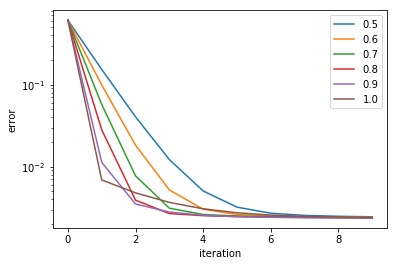

In [396]:
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('error')
plt.plot(error[:7,:].T)
plt.legend(labels= solution[:,0])
plt.show()

In [192]:
error.T

array([[  3.02477493e+02,   2.44976657e-01],
       [  1.08179967e+02,   2.41003553e-01],
       [  3.88290392e+01,   2.37095835e-01],
       [  1.40750470e+01,   2.33252426e-01],
       [  5.23894994e+00,   2.29472269e-01],
       [  2.08439690e+00,   2.25754322e-01],
       [  9.57748033e-01,   2.22097561e-01],
       [  5.54917167e-01,   2.18500979e-01],
       [  4.10439480e-01,   2.14963585e-01],
       [  3.58177563e-01,   2.11484404e-01],
       [  3.38832323e-01,   2.08062479e-01],
       [  3.31238249e-01,   2.04696867e-01],
       [  3.27840771e-01,   2.01386641e-01],
       [  3.25943443e-01,   1.98130889e-01],
       [  3.24583823e-01,   1.94928714e-01],
       [  3.23418379e-01,   1.91779235e-01],
       [  3.22324489e-01,   1.88681583e-01],
       [  3.21258377e-01,   1.85634907e-01],
       [  3.20204411e-01,   1.82638366e-01],
       [  3.19157004e-01,   1.79691135e-01],
       [  3.18114156e-01,   1.76792403e-01],
       [  3.17075143e-01,   1.73941371e-01],
       [  